# Notebook for doing quick tests with SPG
* Adding new elements
* Playing with agents
* etc

In [123]:
from simple_playgrounds.playground.layouts import SingleRoom
from simple_playgrounds.engine import Engine
from simple_playgrounds.element.elements.zone import HealingZone, RewardZone
from simple_playgrounds.agent.controllers import Keyboard
from simple_playgrounds.device.sensors.semantic import PerfectSemantic
from simple_playgrounds.agent.agents import BaseAgent
import pygame
import matplotlib.pyplot as plt

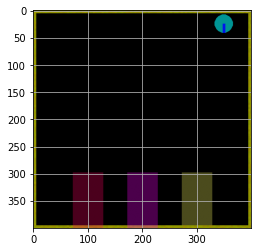

In [125]:
# Create playground
my_playground = SingleRoom(size=(400, 400))
zone = RewardZone(
    reward=1.0,
    limit=10000,
    physical_shape="rectangle",
    texture=[255, 0, 100],
    size=(50, 100),
)
my_playground.add_element(zone, ((100, 350), 0))
zone = RewardZone(
    reward=1.0,
    limit=10000,
    physical_shape="rectangle",
    texture=[255, 0, 255],
    size=(50, 100),
)
my_playground.add_element(zone, ((200, 350), 0))
zone = RewardZone(
    reward=1.0,
    limit=10000,
    physical_shape="rectangle",
    texture=[255, 255, 100],
    size=(50, 100),
)
my_playground.add_element(zone, ((300, 350), 0))

agent = BaseAgent(controller=Keyboard())
agent.add_sensor(
    PerfectSemantic(
        agent.base_platform,
        min_range=0,
        max_range=400,
        name="sensor",
        normalize=True,
    )
)
my_playground.add_agent(agent, ((350, 25), 3.14 / 2))
engine = Engine(time_limit=1000, playground=my_playground)
plt.imshow(engine.generate_playground_image())
plt.grid()

# run episode
RUN = True
if RUN:
    i = 0
    while engine.game_on:
        i += 1
        actions = engine.get_actions()
        engine.step(actions)
        engine.update_observations()
        pygame.time.wait(100)
engine.terminate()

In [122]:
agent.observations

{<simple_playgrounds.device.sensors.semantic.PerfectSemantic at 0x7ff39b4016a0>: [Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7ff39b455760>, distance=0.3463825963879533, angle=-1.5700000000000003),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7ff3a1290220>, distance=0.6286174036120467, angle=1.5715926535897928),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7ff39bacc580>, distance=0.6603602468799675, angle=0.0007963267948962738),
  Detection(entity=<simple_playgrounds.element.elements.basic.Wall object at 0x7ff39b452b50>, distance=0.31463975312003245, angle=-3.140796326794897)]}